# Quantum Teleportation

Quantum teleportation is the transfer of quantum states from one qubit to another. In classical computes we can copy information but on a quantum computer, transferring by copying will destroy the quantum state as it will be a measurement on the quantum state. So we instead exploit entanglement which is the quantum teleportation circuit.

In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3,3) #build circuit with 3 qubit and 3 bits

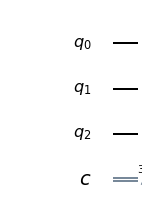

In [3]:
%matplotlib inline
circuit.draw(output = 'mpl')

We want to take the state 1 from q0 and transfer it to q2, q1 is a resourse that we use to do this process.

Lets apply X gate to take state 0 to 1.

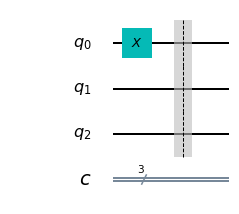

In [4]:
circuit.x(0) #apply x gate on q0
circuit.barrier()
circuit.draw(output = 'mpl')

For the teleportation protocol, we first need to create entanglement between q1 and q2.

In [6]:
circuit.h(1) #apply hadamard on q1
circuit.cx(1,2) #apply controlled x between q1 and q2

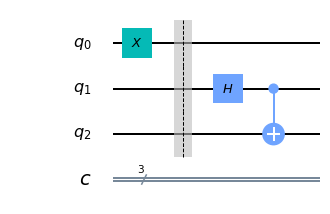

In [7]:
circuit.draw(output = 'mpl')

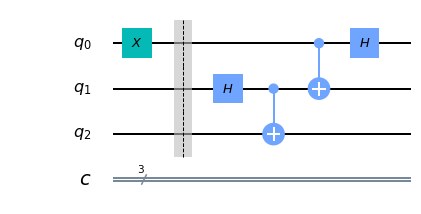

In [8]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output = 'mpl')

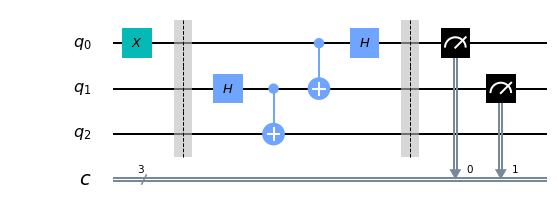

In [9]:
circuit.barrier() #add barrier just to see it clearly
circuit.measure([0,1], [0,1]) #measure q0 and q1 and store it in bit 0 and 1
circuit.draw(output = 'mpl')

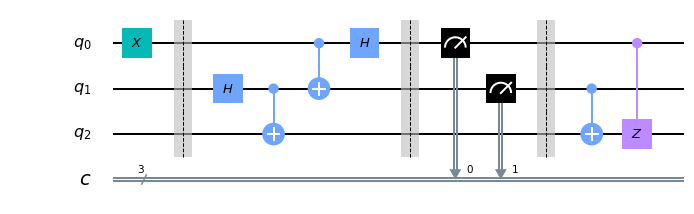

In [10]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output = 'mpl')

This is the protocol. Make sure it is working by visualizing the results.

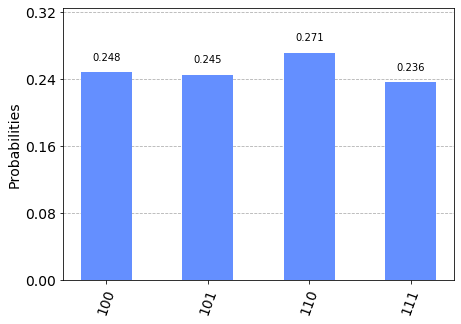

In [14]:
circuit.measure(2,2) #take results from qubit 2 and put into classical register 2
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As we have taken the results from q2 and put it in c2, which is the last number, and we only get results when the c2 is equal to 1.

In [15]:
print(counts)

{'110': 277, '111': 242, '100': 254, '101': 251}


So what we've done is taken the state in q0 and teleported it to q2.